In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
df_train=pd.read_csv('train_ctrUa4K.csv')
df_test=pd.read_csv('test_lAUu6dG.csv')
df_submsn=pd.read_csv('sample_submission_49d68Cx.csv')

In [248]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [249]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [251]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [252]:
df_train.drop('Loan_ID',axis=1,inplace=True)

In [253]:
numerical_columns=df_train.select_dtypes(include='number').columns
categorical_columns=df_train.select_dtypes(include='object').columns

In [254]:
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [256]:
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [183]:
for col in categorical_columns:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)

In [257]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [258]:
df_train.corr()

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_13132\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [259]:

for col in numerical_columns:
    if col!='Credit_History':
        
        df_train[col].fillna(df_train[col].median(),inplace=True)
        

In [260]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

In [261]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [262]:
df_train[df_train.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [263]:
df_train.corr()

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_13132\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


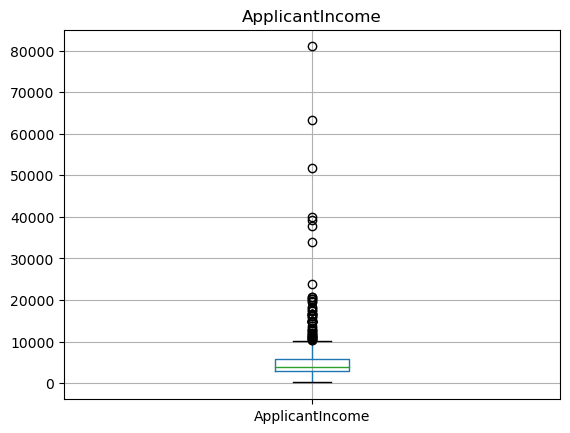

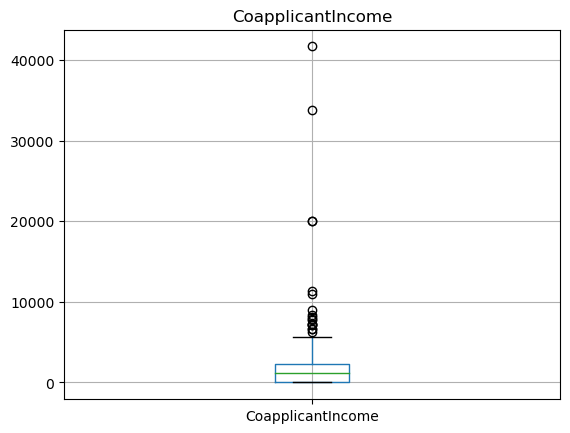

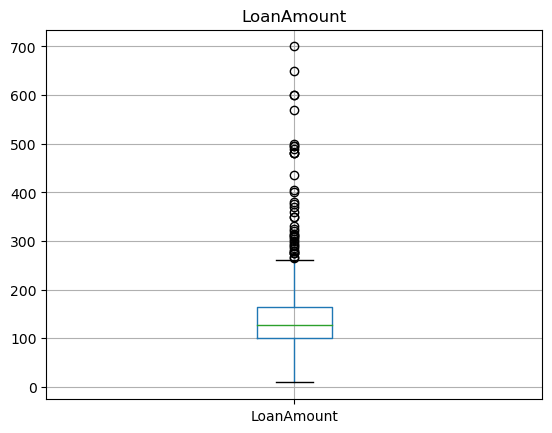

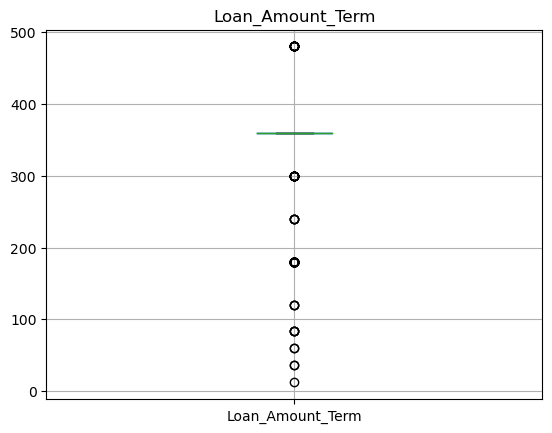

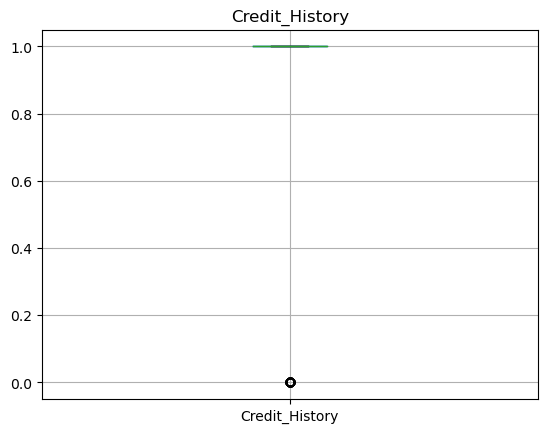

In [265]:
for col in numerical_columns:
    
    plt.figure()
    df_train.boxplot([col])
    plt.title(col)

In [266]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in categorical_columns:
    df_train[col]=encoder.fit_transform(df_train[col])


In [267]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [268]:
for col in numerical_columns:
    df_train[col]=scaler.fit_transform(df_train[[col]])

In [269]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1


In [270]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [271]:
numerical_columns_test=df_test.select_dtypes(include='number').columns
categorical_columns_test=df_test.select_dtypes(include='object').columns

In [272]:
for col in numerical_columns_test:
    if col!='Credit_History':
        
        df_test[col].fillna(df_test[col].mean(),inplace=True)

In [199]:
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)

In [273]:
for col in categorical_columns_test:
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)

In [274]:
df_test.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [275]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [276]:
x=df_train.drop(['Loan_Status'],axis=1) 
y=df_train['Loan_Status']

In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [278]:
x_train.shape

(491, 11)

In [279]:
x_test.shape

(123, 11)

In [280]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [281]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7886178861788617
Precision is 0.7596153846153846
Recall is 0.9875
f1 score is 0.8586956521739131


In [282]:
from sklearn.neighbors import KNeighborsClassifier 
metric_k=[]
neighbors=np.arange(3,15) 

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=4) 
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [283]:
metric_k

[0.7479674796747967,
 0.6910569105691057,
 0.7560975609756098,
 0.7317073170731707,
 0.7804878048780488,
 0.7723577235772358,
 0.7886178861788617,
 0.7886178861788617,
 0.7886178861788617,
 0.7804878048780488,
 0.7967479674796748,
 0.7886178861788617]

In [285]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=4)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [286]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7967479674796748
Precision is 0.7619047619047619
Recall is 1.0
f1 score is 0.8648648648648648


In [287]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 0, 80]], dtype=int64)

In [288]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [289]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.6747967479674797
Precision is 0.7439024390243902
Recall is 0.7625
f1 score is 0.7530864197530863


In [290]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [291]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7642276422764228
Precision is 0.7524752475247525
Recall is 0.95
f1 score is 0.8397790055248618


In [292]:
df_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [293]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [294]:
numerical_columns_test=df_test.select_dtypes(include='number').columns
categorical_columns_test=df_test.select_dtypes(include='object').columns

In [295]:
for col in categorical_columns_test:
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)

In [296]:
df_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [297]:
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)

In [298]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in categorical_columns_test:
    df_test[col]=encoder.fit_transform(df_test[col])

In [299]:
for col in numerical_columns:
    df_test[col]=scaler.fit_transform(df_test[[col]])

In [300]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,0.186461,-0.673335,-0.429368,0.270603,0.437674,2
1,1,1,1,1,0,0,-0.352692,-0.029848,-0.166482,0.270603,0.437674,2
2,2,1,1,2,0,0,0.039641,0.098849,1.180807,0.270603,0.437674,2
3,3,1,1,2,0,0,-0.502774,0.418877,-0.593671,0.270603,0.437674,2
4,4,1,0,0,1,0,-0.311909,-0.673335,-0.955139,0.270603,0.437674,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,-0.162439,0.088982,-0.380077,0.270603,0.437674,2
363,363,1,1,0,0,0,-0.132056,-0.369180,-0.347216,0.270603,0.437674,2
364,364,1,0,0,0,0,-0.317211,0.181644,-0.166482,0.270603,0.437674,1
365,365,1,1,0,0,0,0.039641,0.353241,0.359289,0.270603,0.437674,0


In [301]:
df_test.drop('Loan_ID',axis=1,inplace=True)

In [302]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [303]:
df_test.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [304]:
X_train=df_train.drop(['Loan_Status'],axis=1)
Y_train=df_train['Loan_Status']


In [305]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=4)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(df_test)

In [306]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [307]:
df_submsn.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [316]:
df_loan_status=pd.DataFrame(Y_pred)

In [319]:
df_loan_status.value_counts()

1    305
0     62
dtype: int64

In [322]:
df_loan_status.replace([0,1],['N','Y'],inplace=True)

In [323]:
df_loan_status.value_counts()

Y    305
N     62
dtype: int64

In [324]:
df_submsn['Loan_Status']=df_loan_status

In [329]:
df_submsn['Loan_Status'].value_counts()

Y    305
N     62
Name: Loan_Status, dtype: int64

In [333]:
df_submsn.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [337]:
df_submsn.set_index('Loan_ID',inplace=True)

In [340]:
df_submsn.to_csv('F:/ICT_DSA/assignments/df_submsn.csv')